# Практическая работа №2: Исследование однородного линейного уравнения с периодическими коэффициентами.

Выполнил студент гр. 9381 Шахин Никита, вариант 17.

## Цель работы

Изучение устойчивости однородного линейного уравнения с периодическими коэффициентами при $t \rightarrow +\infty$.

## Основные теоретические положения

Системой однородных линейных дифференциальных уравнений с периодическими коэффициентами называется система однородных линейных ОДУ следующего вида:

$$ X' = A(t) X, \;\; A(t + T) = A(t), \;\; t \ge 0 \;\;\;\;\;\;\;\; (0) $$
$$ X' = (x_1', \dots, x_n')^T, \;\; X = (x_1, \dots, x_n)^T, \;\; A(t) = || a_{ij}(t) ||, \;\; a_{ij}(t + T) = a_{ij}(t)$$

Число $T > 0$ называют периодом коэффициентов системы $(0)$.

Фундаментальной матрицей системы $(0)$ называется такая матрица $\Phi(t)$, что ее стобцы являются линейно независимыми решениями системы $(0)$. В матричном виде: $\Phi' = A(t)\Phi$.

Основной матрицей для фундаментальной матрицы $\Phi(t)$ называется такая матрица $C$, что $\Phi(t + T) = \Phi(t)C, \; \forall t \ge 0$.

Спектральным радиусом матрицы $C$ называется число $r(C) = \max\limits_{i}|\lambda_i|$, где $\lambda_i$ - собственные числа матрицы $C$.

## Постановка задачи

Дано дифференциальное уравнение:

$$ x'' + a(p,t)x = 0, \;\; a(p,t) = p + b(t), \;\; b(t + T) = b(t), $$

где $p$ - параметр.

Данное уравнение сводится к системе двух уравнений I-го порядка:

$$
\begin{cases}
    u'_1 = u_2, \\
    u'_2 = -a(p,t)u_1;
\end{cases}
\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; (1)
$$

Здесь $u_1(t) = x(t), \; u_2(t) = x'(t)$.

Необходимо провести исследование устойчивости однородного линейного уравнения. Дальнейшие рассуждения применимы к любой линейной периодической системе, а не только к системе вида $(1)$.

## Схема решения

1. Задаем массив значений параметра $p$. Например, $p$ меняется от $0.1$ до $5$ с шагом $0.05$. Для каждого значения $p$ проделаем следующие действия:

2. Вычисляем значение фундаментальной матрицы системы $(1)$ при $t = T$ с помощью любой программы численного решения задачи
Коши.
Для этого решаем две задачи Коши с начальными векторами $V_1 = (1, 0)^T$ и $V_2 = (0, 1)^T$ на отрезке $[0, T]$. Пусть вектор-функции $U(t, V_1), \; U(t, V_2)$ – решения этих задач. Они являются столбцами фундаментальной матрицы $\Phi(t)$, удовлетворяющей условию $\Phi(0) = E$. Основную матрицу $C$ для $\Phi(t)$ получаем из формулы $C = \Phi(T)$.
Столбцы матрицы $C$ это векторы $U(T, V_1), U(T, V_2)$;

3. Вычисляем собственные числа матрицы 𝐶 и ее спектральный радиус, т.е.
$$ r(p) = \max\limits_{j = 1,2}|\lambda_j|.$$
В результате имеем массив значений $r(p)$;

4. Вывод об устойчивости или неустойчивости делается в зависимости от значения $r(p)$.

Рекомендуется построить график этой зависимости, из которого с достаточной точностью можно определить точку 𝑝0, которая разделяет зоны устойчивости и неустойчивости, в которых $r \le 1$ и $r \gt 1$. Более точно
вычисляется методом половинного деления.

Матрицу $C$ можно найти только приближенно, решая численно две задачи Коши.

## Выполнение работы

### Вариант 17

Функция $b(t)$ задана следующим выражением:

$$ b(t) = ln(2 + sin(\dfrac{t}{2})) $$

Объявим функции  $b(t)$  и  $a(p,t)$ , а также их период $ T=4\pi $:

In [20]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
import math

def b(t):
    return math.log(2 + math.sin(t/2))

def a(p, t):
    return p + b(t)

T = 4*math.pi

Определяем функцию системы уравнений, массив значений $p$ и начальные вектора $V_1=(1,0)^T$ и $V_2=(0,1)^T$. Объявляем
переменную для спектральных радиусов

Для каждого $p$ находим фундаментальную матрицу, при $t=T$. Для этого решаем две задачи
Коши с начальными векторами $V_1$ и $V_2$ на отрезке $[0,T]$, решением которых будут являться
вектор-функции $U(t,V_1)$ и $U(t,V_2)$ - столбцы $\phi(t)$

После чего находим основную матрицу для $C$ и ее спектральный радиус - $r(C) = \underset{i} \max{|\lambda_i|}$.

In [29]:
p_values = np.arange(0, 2 + 0.001, 0.001)


def F(u, t):
    return [u[1],-a(p,t)*u[0]]

interval = np.arange(0,T,0.001)
v1 = (1, 0)
v2 = (0, 1)
spec = []

for p in p_values:
    utv1 = integrate.odeint(F,v1,interval)
    utv2 = integrate.odeint(F,v2,interval)
    C=np.array([
        [utv1[-1][0],utv2[-1][0]],
        [utv1[-1][1],utv2[-1][1]]
                ])
    spec.append(max(abs(np.linalg.eigvals(C))))


Построим график спектрального радиуса

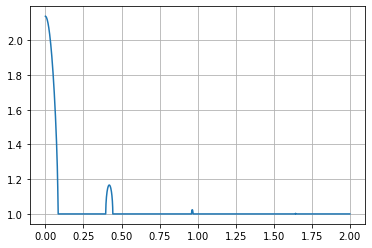

In [36]:
plt.plot(p_values,spec)
plt.grid(True)
plt.show()

Из полученного графика можем определить точку $p_0$, разделяющую зоны устойчивости и неустойчивости
с точностью $\varepsilon=10^{-3}$.

$|r(p_0)-1|<\varepsilon$

In [43]:
p0 = -1
rp0 = -1

for i in range(1, len(spec)):
    if abs(spec[-i] - 1) > 0.001:
        p0 = p_values[-i + 1]
        rp0 = spec[-i + 1]
        break

print("p0 = {}, r(p0) = {}".format(p0, rp0))

p0 = 1.645, r(p0) = 1.0000001495975488


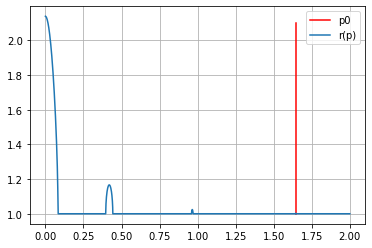

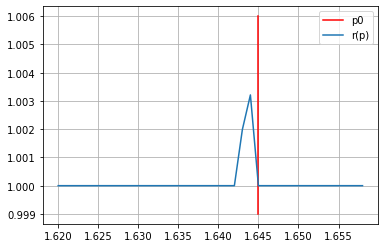

In [42]:
plt.plot([p0, p0], [0.999, 2.1], color="red", label="p0")
plt.plot(p_values, spec, label="r(p)")
plt.grid(True)
plt.legend()
plt.show()

plt.plot([p0, p0], [0.999, 1.006], color="red", label="p0")
plt.plot(p_values[int(1.62 / 0.001): int(1.66 / 0.001)], spec[int(1.62 / 0.001): int(1.66 / 0.001)], label="r(p)")
plt.grid(True)
plt.legend()
plt.show()

Граница между зонами устойчивости и неустойчивости найдена корректно и равна $p_0 = 1.645$. При значениях $p < p_0$ наблюдаются области со значением $r(p) > 1$. При таких значениях $p$ по крайней мере часть решений системы не ограничена. 

## Вывод

В ходе практической работы было проведено изучение устойчивости системы однородных линейных ОДУ с переодическими коэффициетами при $t \rightarrow +\infty$.

Были получены следующие результаты:
- Найдена граница зоны устойчивости и неустойчивости $p_0 = 1.645$
- При $p < p_0 = 1.645$ система является неустойчивой
- При $p >= p_0 = 1.645$ система является устойчивой


Значение $p_0$ было найдено с точностью $|r(p_0) - 1| < 0.001$.